# Estadística aplicada a la investigación

# Datos (Ejemplo) 

1. Una escala de conocimiento de autocuidado es aplicada a 160 pacientes, luego se les da un curso y se vuelve a aplicar la escala.  
- 
Decidir si las siguientes afirmaciones son verdaderas o falsas.

- Existen diferencias entre las puntuaciones de las personas por sexo antes de iniciar el curso.
- Existen diferencias entre las puntuaciones de las personas por edad antes de iniciar el curso.
- Existen diferencias entre las puntuaciones de las personas después de finalizar el curso. (hay que tener en cuenta que son datos pareados)

2. Construir la variable diferencia $Escala post- Escala pre$ y hacer un modelo de regresión en función de la edad y el sexo. 
- Realizar la tabla ANOVA
- Realizar el analisis de cada una de las causas de variación.

In [ ]:
library(tidyverse)
url ="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Escala_ejemplo.csv"
Escala = read_csv2(url)
head(Escala)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 160 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): sexo
dbl (3): pre, pos, edad

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sexo,pre,pos,edad
<chr>,<dbl>,<dbl>,<dbl>
F,83,83,48
M,58,65,37
M,63,77,66
F,73,70,46
M,64,72,47
M,63,79,28


## La prueba más básica
$$H_0: \mu_D\leq 0$$
$$H_a: \mu_D> 0$$


-Hipótesis operativa: El curso mejora la escala.

In [ ]:
## Calculo las diferencias

Escala = Escala %>% mutate(Diferencia = pos-pre)
Escala

sexo,pre,pos,edad,Diferencia
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,83,83,48,0
M,58,65,37,7
M,63,77,66,14
F,73,70,46,-3
M,64,72,47,8
M,63,79,28,16
M,68,77,63,9
M,58,76,63,18
M,59,76,50,17


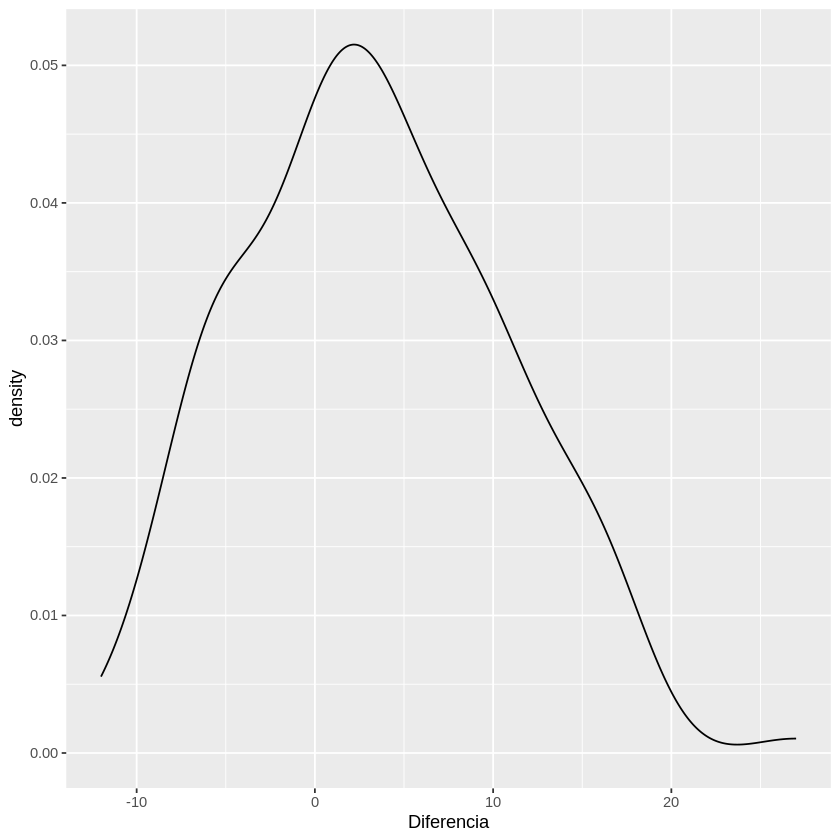

In [ ]:
ggplot(Escala, aes(x=Diferencia))+geom_density()

In [ ]:
### t.test()
t.test(Escala$Diferencia, conf.level = 0.95, alternative = "greater")


	One Sample t-test

data:  Escala$Diferencia
t = 5.7567, df = 159, p-value = 2.151e-08
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 2.369378      Inf
sample estimates:
mean of x 
    3.325 


In [ ]:
### t.test() 
## Esta me sirve para hacer el intervalo de confianza
t.test(Escala$Diferencia, conf.level = 0.95, alternative = "two.sided")


	One Sample t-test

data:  Escala$Diferencia
t = 5.7567, df = 159, p-value = 4.302e-08
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.184258 4.465742
sample estimates:
mean of x 
    3.325 


## Modelo ANOVA sencillo

In [ ]:
modelo = lm(Diferencia ~ factor(sexo) + edad, data=Escala)

In [ ]:
modelo


Call:
lm(formula = Diferencia ~ factor(sexo) + edad, data = Escala)

Coefficients:
  (Intercept)  factor(sexo)M           edad  
      1.45412       10.52398       -0.05149  


## ANOVA 
1. Vamos a ver lo significativo

In [ ]:
print(anova(modelo))

Analysis of Variance Table

Response: Diferencia
              Df Sum Sq Mean Sq  F value Pr(>F)    
factor(sexo)   1 4137.5  4137.5 150.7170 <2e-16 ***
edad           1   39.6    39.6   1.4442 0.2313    
Residuals    157 4310.0    27.5                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Analizar el modelo

In [ ]:
modelo


Call:
lm(formula = Diferencia ~ factor(sexo) + edad, data = Escala)

Coefficients:
  (Intercept)  factor(sexo)M           edad  
      1.45412       10.52398       -0.05149  


## Pruebas necesarias para el modelo

### Normalidad

In [ ]:
resid = residuals(modelo)
residuales = data.frame(resid)
residuales


,resid
,<dbl>
1,1.01737225
2,-3.07298889
3,5.42020272
4,-2.08560648
5,-1.55809523
6,5.46360682
7,0.26573462
8,9.26573462
9,7.59637287


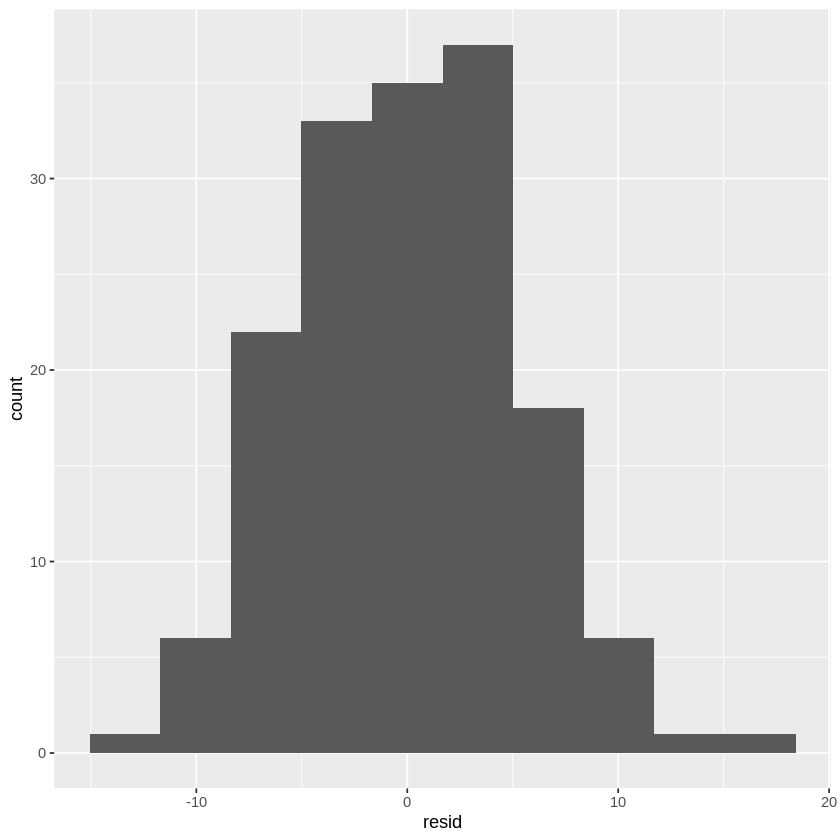

In [ ]:
ggplot(residuales, aes(x=resid))+geom_histogram(bins=10)

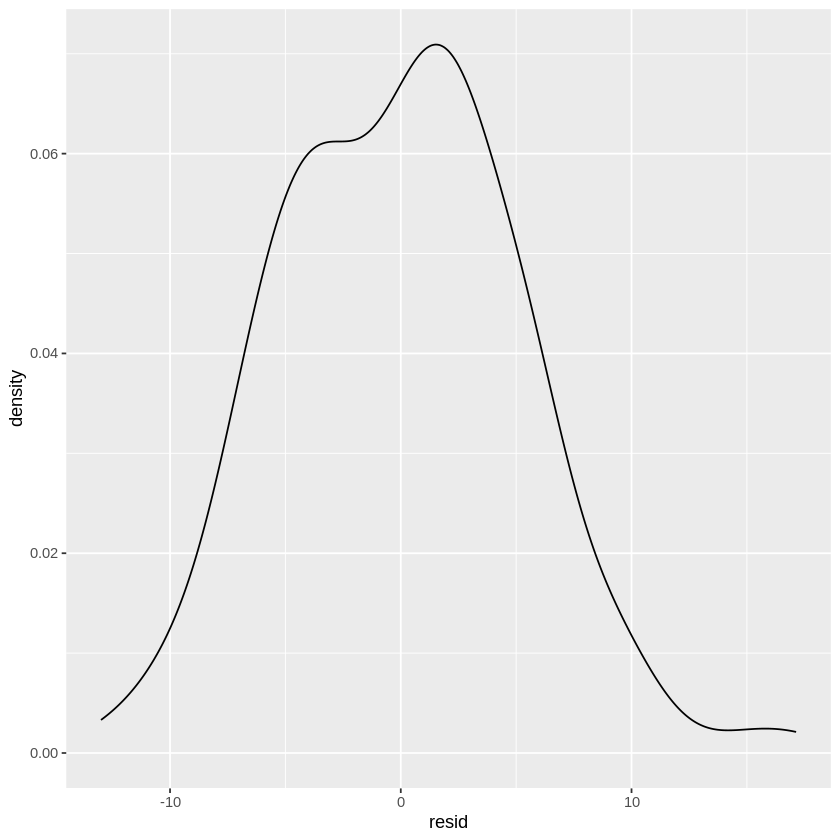

In [ ]:
ggplot(residuales, aes(x=resid))+geom_density()

Pruebas de normalidad

1. Shapiro Wilk
2. Kolmogorov smirnov

In [ ]:
shapiro.test(residuales$resid)


	Shapiro-Wilk normality test

data:  residuales$resid
W = 0.99208, p-value = 0.5241


In [ ]:
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
lillie.test(residuales$resid)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuales$resid
D = 0.047482, p-value = 0.508


## Otro modelo

In [ ]:
Escala = Escala %>% mutate(sexo1 = ifelse(sexo=="F", "Mujer", "Hombre"))
modelo = lm(Diferencia ~ factor(sexo1) + edad, data=Escala)
print(anova(modelo))
modelo

Analysis of Variance Table

Response: Diferencia
               Df Sum Sq Mean Sq  F value Pr(>F)    
factor(sexo1)   1 4137.5  4137.5 150.7170 <2e-16 ***
edad            1   39.6    39.6   1.4442 0.2313    
Residuals     157 4310.0    27.5                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
lm(formula = Diferencia ~ factor(sexo1) + edad, data = Escala)

Coefficients:
       (Intercept)  factor(sexo1)Mujer                edad  
          11.97810           -10.52398            -0.05149  


In [ ]:
Escala %>% group_by(sexo) %>% summarise(media=mean(Diferencia))

sexo,media
<chr>,<dbl>
F,-0.7731959
M,9.6349206


### Pruebas de normalidad

In [ ]:
resid = residuals(modelo)
residuales = data.frame(resid)
residuales

,resid
,<dbl>
1,1.01737225
2,-3.07298889
3,5.42020272
4,-2.08560648
5,-1.55809523
6,5.46360682
7,0.26573462
8,9.26573462
9,7.59637287


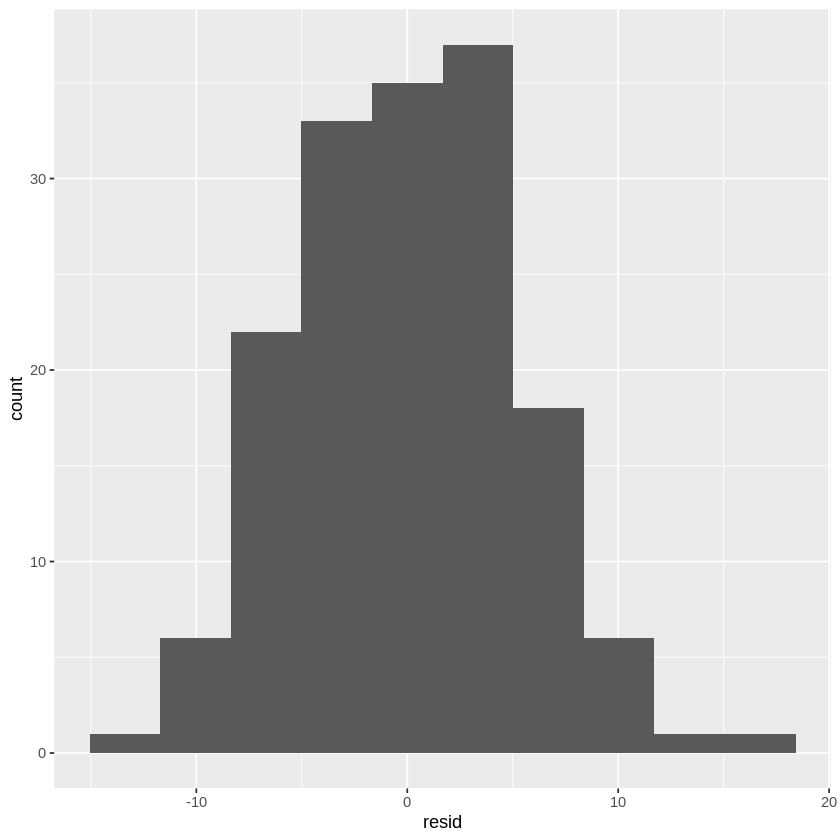

In [ ]:
ggplot(residuales, aes(x=resid))+geom_histogram(bins=10)

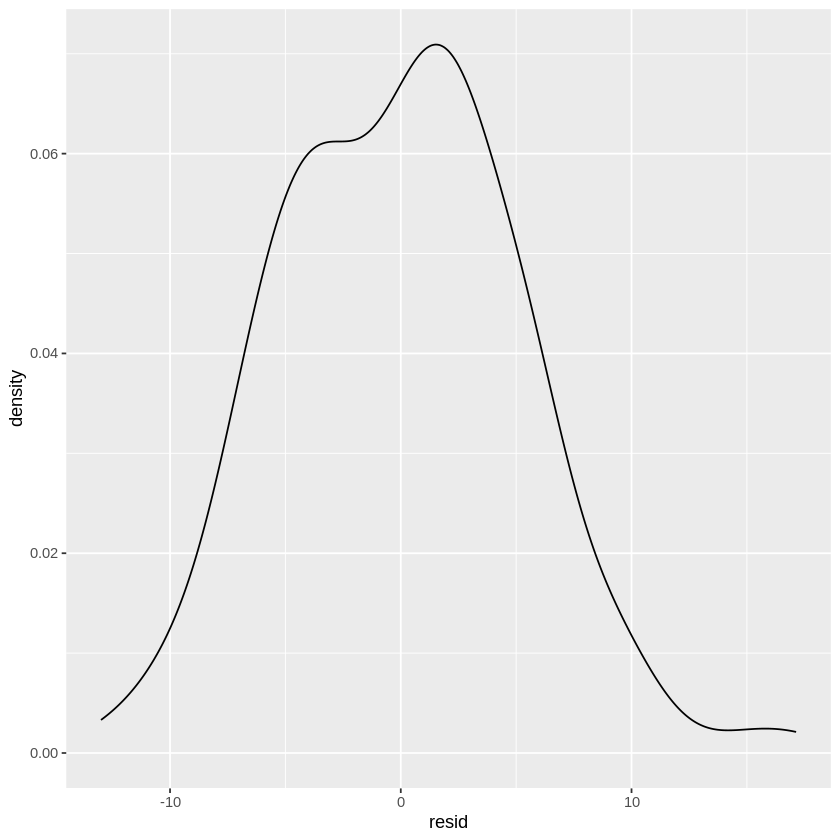

In [ ]:
ggplot(residuales, aes(x=resid))+geom_density()

In [ ]:
shapiro.test(residuales$resid)


	Shapiro-Wilk normality test

data:  residuales$resid
W = 0.99208, p-value = 0.5241


In [ ]:
lillie.test(residuales$resid)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuales$resid
D = 0.047482, p-value = 0.508


## Gráfica de la diferencia

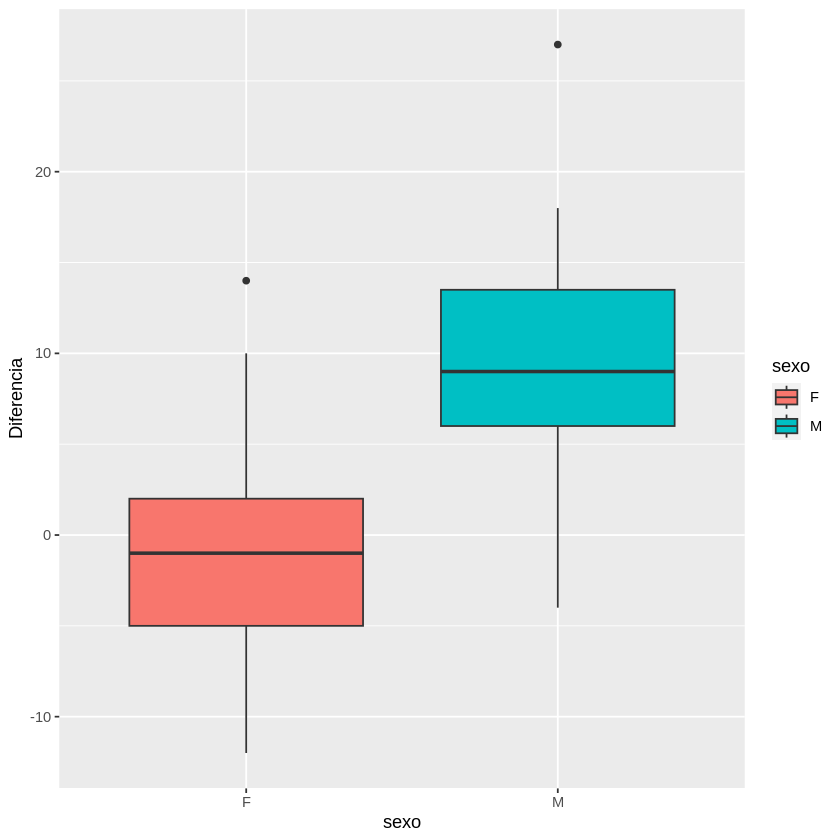

In [ ]:
ggplot(Escala, aes(x=sexo, y=Diferencia, fill=sexo))+
  geom_boxplot()

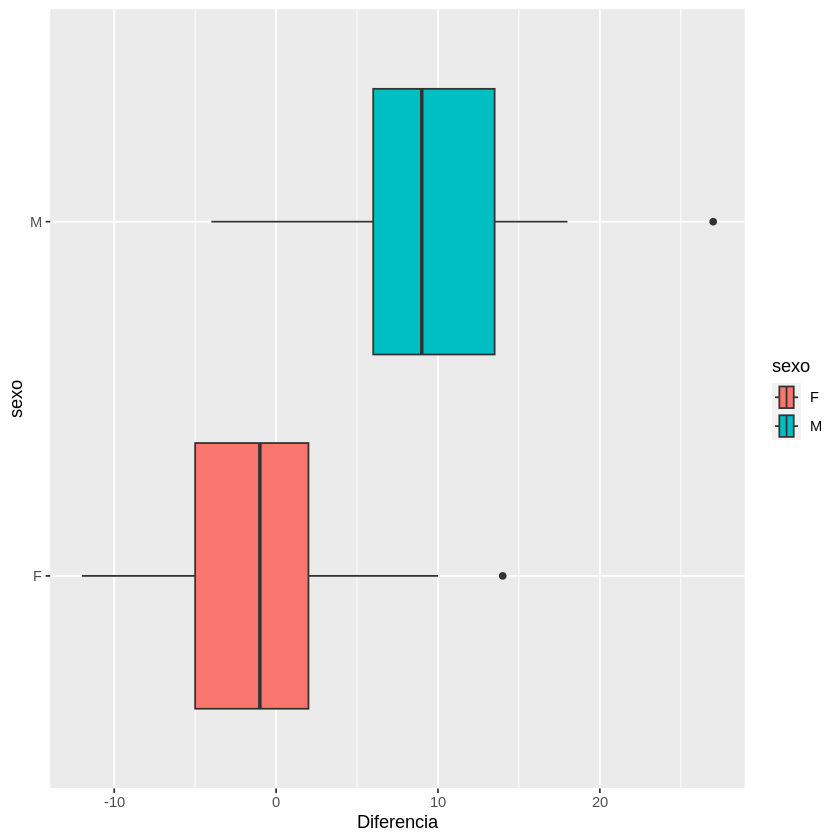

In [ ]:
ggplot(Escala, aes(y=sexo, x=Diferencia, fill=sexo))+
  geom_boxplot()

## Y el analisis previo

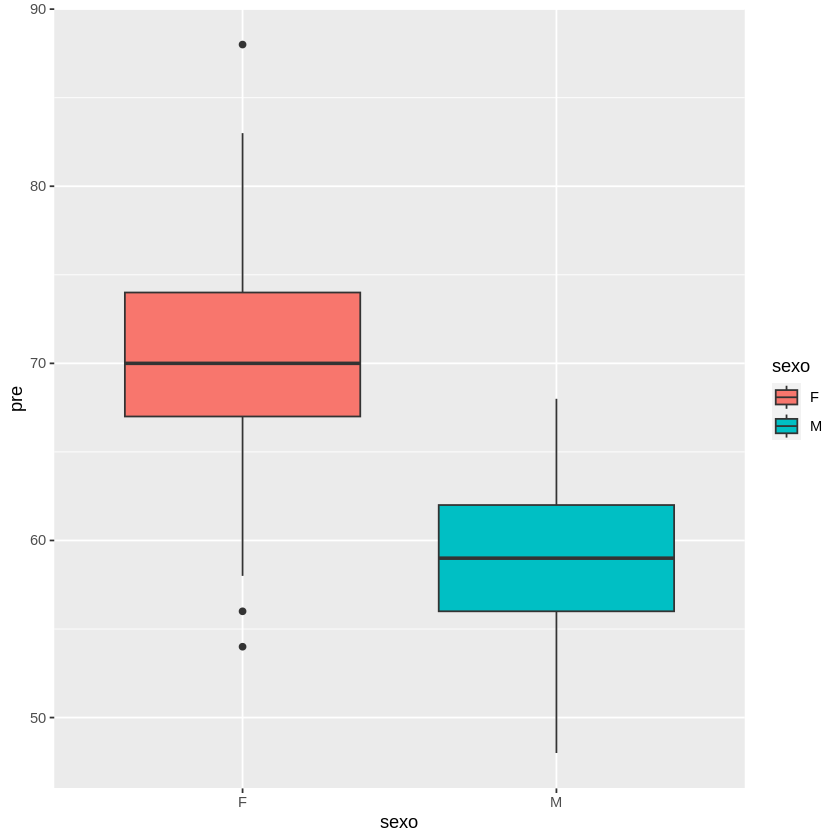

In [ ]:
ggplot(Escala, aes(x=sexo, y=pre, fill=sexo))+
  geom_boxplot()

## El posterior

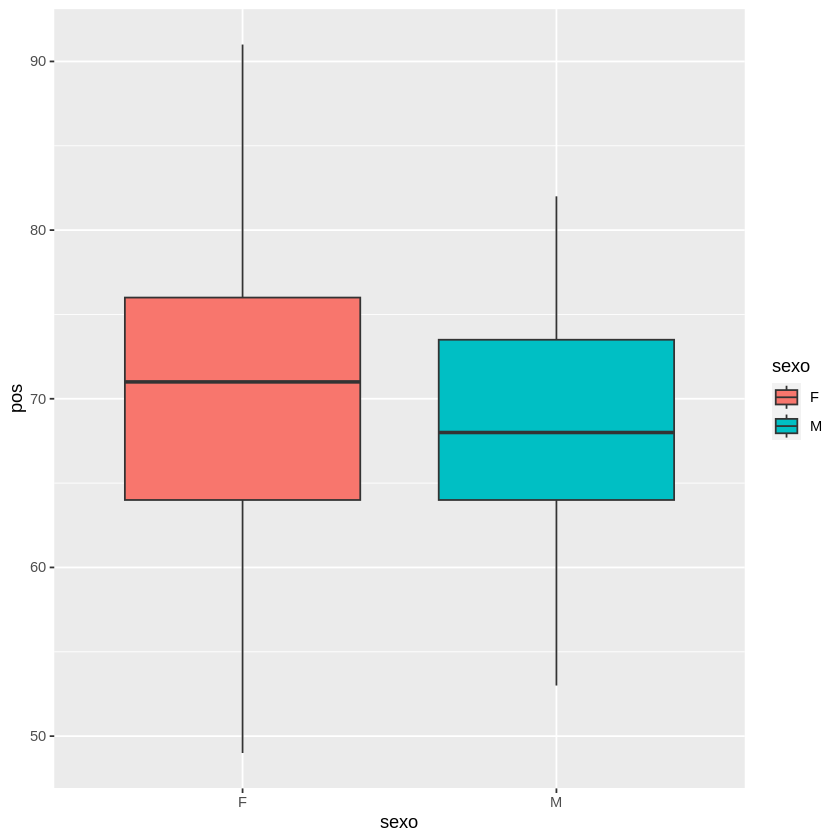

In [ ]:
ggplot(Escala, aes(x=sexo, y=pos, fill=sexo))+
  geom_boxplot()

## Y la edad

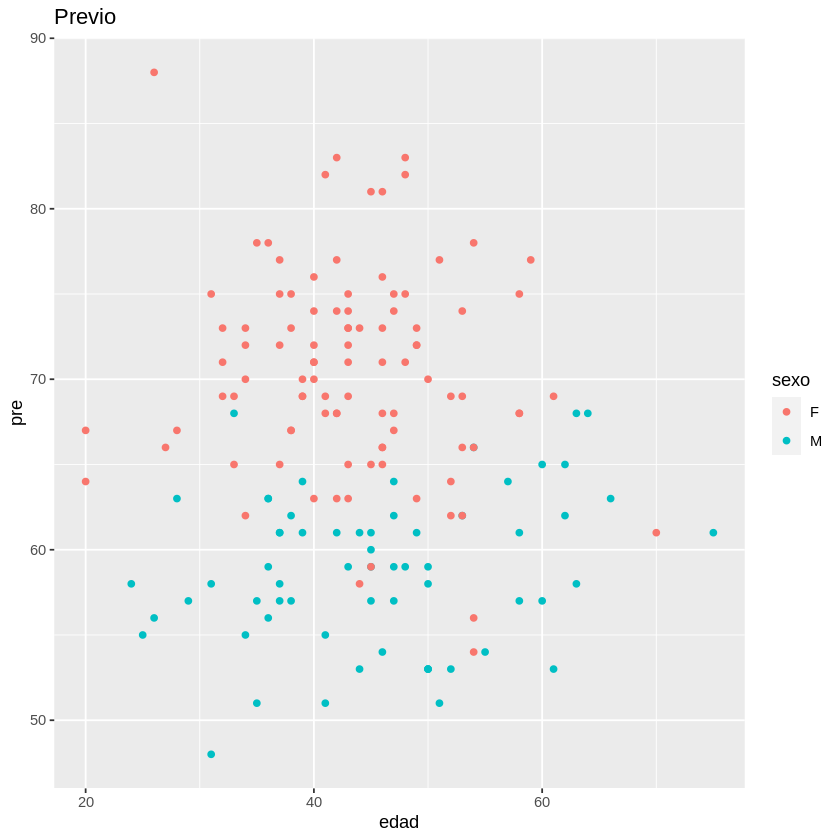

In [ ]:
ggplot(Escala, aes(x=edad, y=pre, color=sexo))+
  geom_point()+ggtitle("Previo")

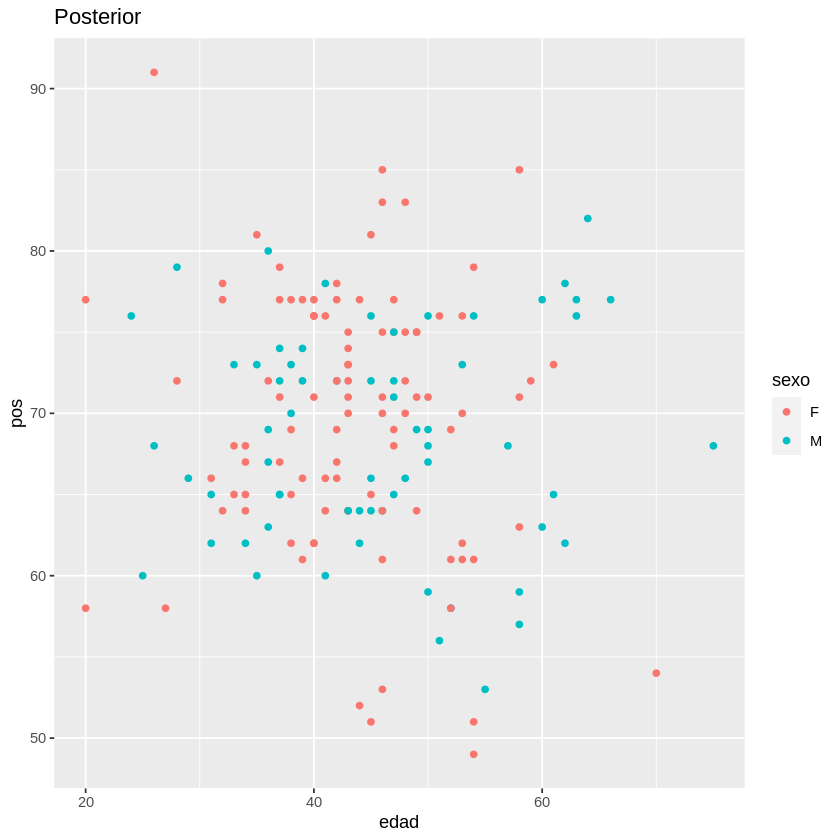

In [ ]:
ggplot(Escala, aes(x=edad, y=pos, color=sexo))+
  geom_point()+ggtitle("Posterior")

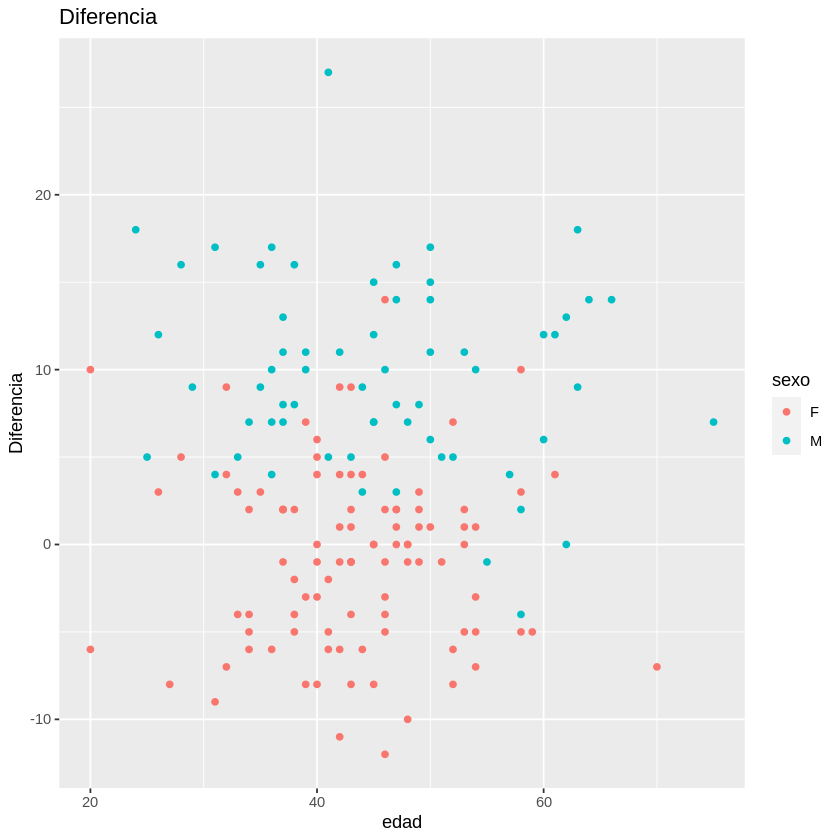

In [ ]:
ggplot(Escala, aes(x=edad, y=Diferencia, color=sexo))+
  geom_point()+ggtitle("Diferencia")

## Combinando

In [ ]:
previo = Escala %>% mutate(puntaje = pre) %>%
   select(edad,sexo, puntaje) %>% 
  mutate(Tipo ="pre")
posterior = Escala %>% mutate(puntaje = pos) %>%
   select(edad,sexo, puntaje) %>%
   mutate(Tipo ="pos")
datos = rbind(previo, posterior)
datos

edad,sexo,puntaje,Tipo
<dbl>,<chr>,<dbl>,<chr>
48,F,83,pre
37,M,58,pre
66,M,63,pre
46,F,73,pre
47,M,64,pre
28,M,63,pre
63,M,68,pre
63,M,58,pre
50,M,59,pre


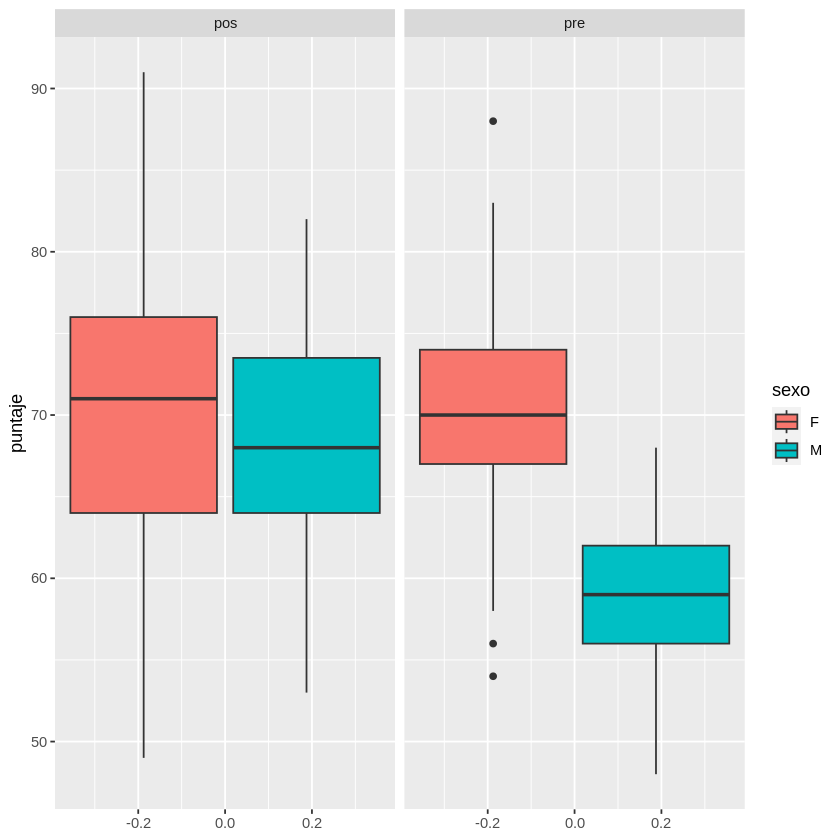

In [ ]:
ggplot(datos, aes(y=puntaje, fill=sexo))+
  geom_boxplot()+facet_grid(.~Tipo)

# Y si tengo muchas covariables, ¡Regresión!

# Sí la variable respuesta es cuantitativa

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

Descripción [acá](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001) y [acá](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#)

In [ ]:
library(tidyverse)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
falla_cardiaca = read_csv(url)
head(falla_cardiaca)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


## Modelo de regresión 1

- Variable objetivo = Serun Creatinine
- Variables explicativas = age, high blood pressure, smoking

In [ ]:
modelo1 = lm(serum_creatinine ~ age + high_blood_pressure + smoking+ sex, data = falla_cardiaca)
modelo1


Call:
lm(formula = serum_creatinine ~ age + high_blood_pressure + smoking + 
    sex, data = falla_cardiaca)

Coefficients:
        (Intercept)                  age  high_blood_pressure  
            0.56837              0.01401             -0.04521  
            smoking                  sex  
           -0.08012              0.02248  


In [ ]:
print(anova(modelo1))

Analysis of Variance Table

Response: serum_creatinine
                     Df  Sum Sq Mean Sq F value   Pr(>F)   
age                   1   8.082  8.0817  7.6554 0.006019 **
high_blood_pressure   1   0.126  0.1259  0.1193 0.730049   
smoking               1   0.318  0.3183  0.3015 0.583368   
sex                   1   0.027  0.0272  0.0258 0.872533   
Residuals           294 310.370  1.0557                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### test de Normalidad

In [ ]:
resid = residuals(modelo1)
residuales = data.frame(resid)
head(residuales)

,resid
,<dbl>
1,0.3033141
2,-0.2616202
3,-0.1216406
4,0.6084497
5,1.2207218
6,0.3732238


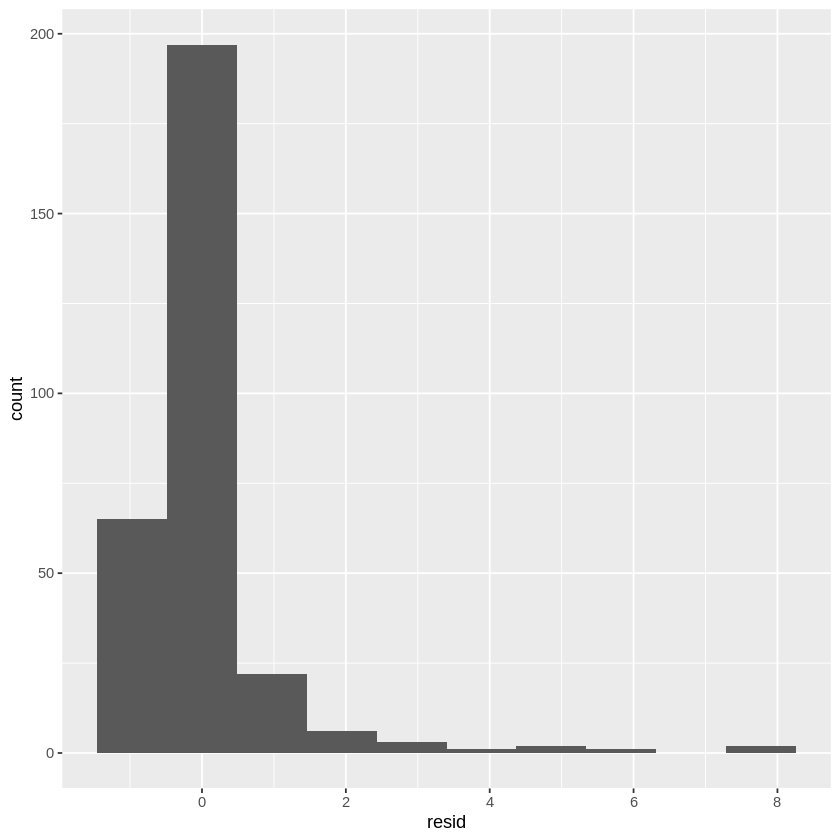

In [ ]:
ggplot(residuales, aes(x=resid))+geom_histogram(bins=10)

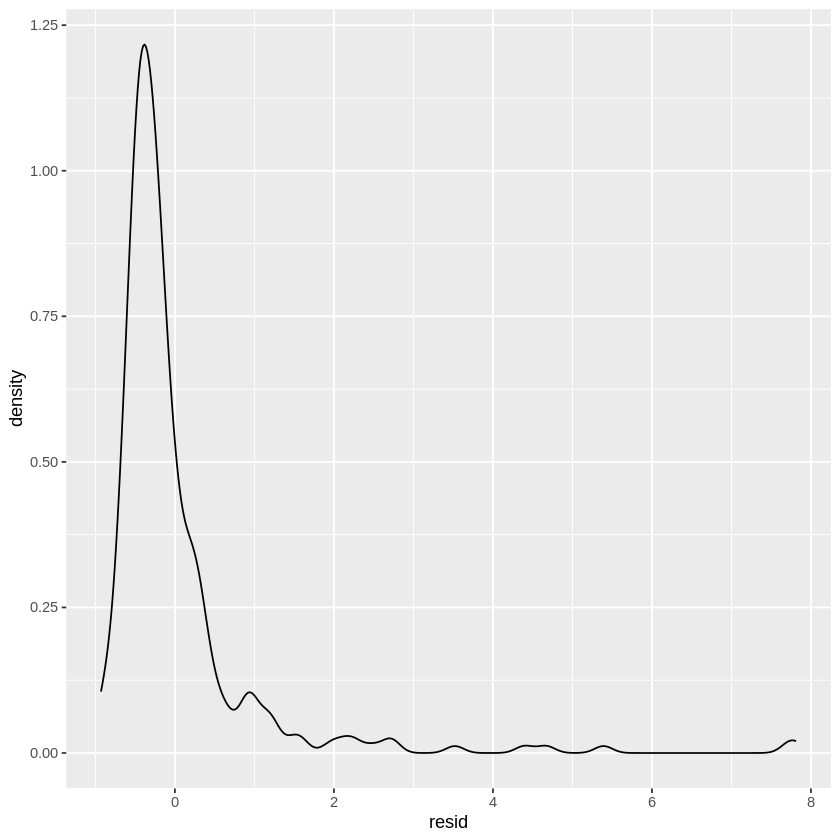

In [ ]:
ggplot(residuales, aes(x=resid))+geom_density()

In [ ]:
shapiro.test(residuales$resid)


	Shapiro-Wilk normality test

data:  residuales$resid
W = 0.5562, p-value < 2.2e-16


In [ ]:
install.packages("nortest")
library(nortest)
lillie.test(residuales$resid)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuales$resid
D = 0.22947, p-value < 2.2e-16


### Solución para este caso

In [ ]:
modelo1 = lm(log(serum_creatinine) ~ age + high_blood_pressure + smoking+ sex, data = falla_cardiaca)
modelo1


Call:
lm(formula = log(serum_creatinine) ~ age + high_blood_pressure + 
    smoking + sex, data = falla_cardiaca)

Coefficients:
        (Intercept)                  age  high_blood_pressure  
          -0.322875             0.008953            -0.071725  
            smoking                  sex  
          -0.061175             0.033337  


In [ ]:
log(0.5)

[1] -0.6931472

In [ ]:
log(1.1)

[1] 0.09531018

In [ ]:
log(9)

[1] 2.197225

In [ ]:
print(anova(modelo1))

Analysis of Variance Table

Response: log(serum_creatinine)
                     Df Sum Sq Mean Sq F value    Pr(>F)    
age                   1  3.211  3.2112 16.4414 6.432e-05 ***
high_blood_pressure   1  0.350  0.3499  1.7915    0.1818    
smoking               1  0.139  0.1385  0.7091    0.4004    
sex                   1  0.060  0.0599  0.3065    0.5803    
Residuals           294 57.422  0.1953                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### test de Normalidad

In [ ]:
resid = residuals(modelo1)
residuales = data.frame(resid)

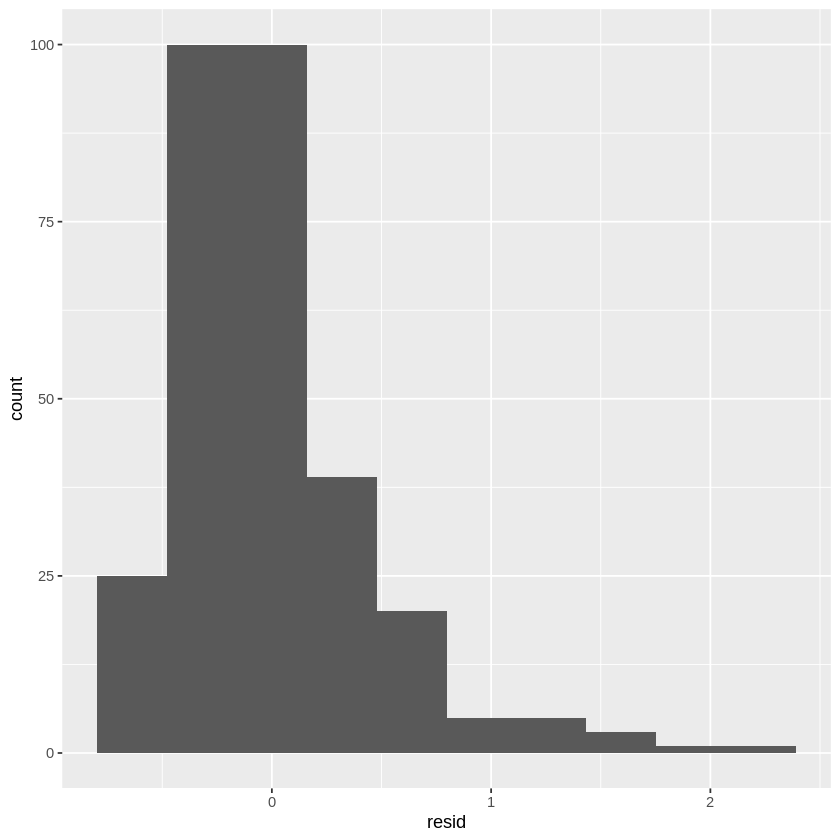

In [ ]:
ggplot(residuales, aes(x=resid))+geom_histogram(bins=10)

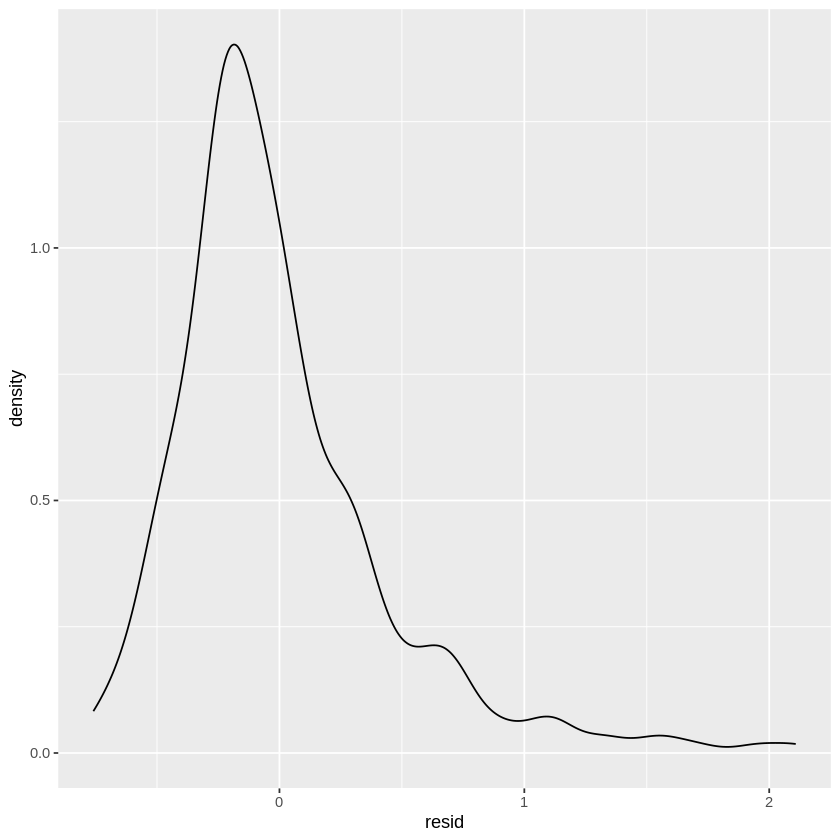

In [ ]:
ggplot(residuales, aes(x=resid))+geom_density()

In [ ]:
shapiro.test(residuales$resid)


	Shapiro-Wilk normality test

data:  residuales$resid
W = 0.87823, p-value = 1.134e-14


In [ ]:
lillie.test(residuales$resid)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuales$resid
D = 0.13266, p-value = 7.488e-14


## Hipotesis interesantes

-El modelo es de la forma
$$Y= \beta_0 +\beta_1\times age +\beta_2\times HB + beta_3 \times smoking + error $$

- La tabla ANOVA va a comparar:
$$H_0:\, \beta_i=0$$

- Sí se analiza el P-valor, se decide sobre la hipótesis

- Si se analiza la Suma de cuadrados (Sum Sq) se analiza la importancia de cada variable sobre la Y. (El $R^2$). Por ejemplo para la edad tenemos
$$R^2_{age} = \frac{8.082}{8.082+0.126+0.318+310.397}=2.5\%$$

- Para analizar el estimador de $\beta_i$ se puede analizar el efecto de cada variable.


In [ ]:
8.0082/(8.0082+310.397+0.4)


[1] 0.02511941

## Resumen del modelo

In [ ]:
summary(modelo1)


Call:
lm(formula = log(serum_creatinine) ~ age + high_blood_pressure + 
    smoking + sex, data = falla_cardiaca)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75988 -0.25765 -0.09695  0.15721  2.10835 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.322875   0.136353  -2.368   0.0185 *  
age                  0.008953   0.002168   4.130 4.74e-05 ***
high_blood_pressure -0.071725   0.054117  -1.325   0.1861    
smoking             -0.061175   0.061165  -1.000   0.3181    
sex                  0.033337   0.060219   0.554   0.5803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4419 on 294 degrees of freedom
Multiple R-squared:  0.06145,	Adjusted R-squared:  0.04868 
F-statistic: 4.812 on 4 and 294 DF,  p-value: 0.000897


## Vamos a interpretar cada $\beta$

Los coeficientes de regresión representan el cambio medio en la variable de respuesta para una unidad de cambio en la variable predictora mientras se mantienen constantes los otros predictores presentes en el modelo. Este control estadístico que ofrece la regresión es importante, porque aísla el rol de una variable del resto de las variables incluidas en el modelo.

La clave para entender los coeficientes es pensar en ellos como pendientes, y con frecuencia se les llama coeficientes de pendiente.


Más información leer [acá]



## Ejercicio 

1. Haga una regresión con todas las variables explicativas siguientes:
age +	anaemia	+ creatinine_phosphokinase	+ diabetes	+ ejection_fraction+	serum_sodium	+ sex +	smoking.

2. Construya la tabla ANOVA

3. Analice que variables presentan diferencias significativas para la variable serum_creatinine

4. Analice los betas

In [ ]:
url ="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/hepatitis_enfermeria.csv"
datosHepa = read_csv(url, na="?")
head(datosHepa)

Rows: 155 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (20): CLASS, AGE, SEX, STEROID, ANTIVIRALS, FATIGUE, MALAISE, ANOREXIA, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,NA,1
2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,NA,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,NA,1
2,31,1,NA,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NA,200,4.0,NA,1
2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


# Dos medias de datos no bonitos (no normales)

In [ ]:
modelo1 = lm(serum_creatinine ~ age + high_blood_pressure + smoking+ sex, data = falla_cardiaca)
modelo1


Call:
lm(formula = serum_creatinine ~ age + high_blood_pressure + smoking + 
    sex, data = falla_cardiaca)

Coefficients:
        (Intercept)                  age  high_blood_pressure  
            0.56837              0.01401             -0.04521  
            smoking                  sex  
           -0.08012              0.02248  


Prueba de Kruskal Wallis, [leer](https://www.cienciadedatos.net/documentos/20_kruskal-wallis_test)


$$H_0: \; \text{Mediana de las rangos en mujeres} =\text{Mediana de las rangos en hombres} $$

$$H_a: \; \text{Mediana de las rangos en mujeres} \neq \text{Mediana de las rangos en hombres} $$

In [ ]:
head(falla_cardiaca %>% select(serum_creatinine, sex), n=10)

serum_creatinine,sex
<dbl>,<dbl>
1.9,1
1.1,1
1.3,1
1.9,1
2.7,0
2.1,1
1.2,1
1.1,1
1.5,0




```
kruskal.test(variable respuesta, variable de grupo)

kruskal.test(datos$y, datos$x)
```





In [ ]:
kruskal.test(falla_cardiaca$serum_creatinine, falla_cardiaca$sex)


	Kruskal-Wallis rank sum test

data:  falla_cardiaca$serum_creatinine and falla_cardiaca$sex
Kruskal-Wallis chi-squared = 0.81151, df = 1, p-value = 0.3677


## Hagamos por edad

1. Problema 1: Es cuantitativa
2. Debemos agruparla

In [ ]:
### Dividir la edad en grupos
falla_cardiaca$Edad_grupos = cut(falla_cardiaca$age, breaks=c(0,15,50,60,100))

kruskal.test(falla_cardiaca$serum_creatinine, falla_cardiaca$Edad_grupos)


	Kruskal-Wallis rank sum test

data:  falla_cardiaca$serum_creatinine and falla_cardiaca$Edad_grupos
Kruskal-Wallis chi-squared = 15.318, df = 2, p-value = 0.0004718


In [ ]:
modeloGamma = glm(serum_creatinine ~ age + high_blood_pressure + smoking+ sex, data = falla_cardiaca,
   family=Gamma)

summary(modeloGamma)


Call:
glm(formula = serum_creatinine ~ age + high_blood_pressure + 
    smoking + sex, family = Gamma, data = falla_cardiaca)

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.124397   0.158986   7.072 1.12e-11 ***
age                 -0.006752   0.002408  -2.804  0.00539 ** 
high_blood_pressure  0.020781   0.063822   0.326  0.74496    
smoking              0.037731   0.072489   0.520  0.60311    
sex                 -0.008875   0.070508  -0.126  0.89992    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.5353088)

    Null deviance: 79.835  on 298  degrees of freedom
Residual deviance: 75.620  on 294  degrees of freedom
AIC: 580.81

Number of Fisher Scoring iterations: 6


## Solución con modelos lineales generalizados

1. Regresión logística (variables de 0 y 1), de exito y fracaso
2. Regresión de Poison (Conteos pequeños) 
3. Regresión Gamma (Datos muy sesgados a la derecha), como la creatinina
4. Modelos de supervivencia (Para datos de tiempo de muerte)



```
Modelo de sobrevida
y = Tiempo de hospitalización
x1 = Edad
x2 = Sexo
x3 = preexistencias
...
..
censura = (1, si salió vivo, 0 si no salió o pidió salió voluntaria)

library(survival)

modelo = Surv(y ~ x1+x2+x3+...., censura=censura, datos)
```



# Una introducción a cualitivo en R

1. **Quanteda**: [acá](https://cran.r-project.org/web/packages/quanteda/index.html)

In [ ]:
install.packages("quanteda")
library(quanteda)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ISOcodes’, ‘fastmatch’, ‘Rcpp’, ‘RcppParallel’, ‘SnowballC’, ‘stopwords’, ‘RcppArmadillo’


Package version: 3.3.0
Unicode version: 13.0
ICU version: 66.1

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.



### Quanteda

La guía de uso está en esta pagina [acá](https://cran.r-project.org/web/packages/quanteda/vignettes/quickstart.html)

### Corpus en R

In [ ]:
corp_uk <- corpus(data_char_ukimmig2010)  # build a new corpus from the texts
summary(corp_uk)

,Text,Types,Tokens,Sentences
,<chr>,<int>,<int>,<int>
1,BNP,1125,3280,88
2,Coalition,142,260,4
3,Conservative,251,499,15
4,Greens,322,677,21
5,Labour,298,680,29
6,LibDem,251,483,14
7,PC,77,114,5
8,SNP,88,134,4
9,UKIP,346,722,26


In [ ]:
corp_uk

Corpus consisting of 9 documents.
BNP :
"IMMIGRATION: AN UNPARALLELED CRISIS WHICH ONLY THE BNP CAN S..."

Coalition :
"IMMIGRATION.  The Government believes that immigration has e..."

Conservative :
"Attract the brightest and best to our country. Immigration h..."

Greens :
"Immigration. Migration is a fact of life.  People have alway..."

Labour :
"Crime and immigration The challenge for Britain We will cont..."

LibDem :
"firm but fair immigration system Britain has always been an ..."

[ reached max_ndoc ... 3 more documents ]

In [ ]:
install.packages("readtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘qpdf’, ‘RCurl’, ‘rjson’, ‘ndjson’, ‘antiword’, ‘pdftools’, ‘readODS’, ‘streamR’, ‘striprtf’


Warning message in install.packages("readtext"):
“installation of package ‘pdftools’ had non-zero exit status”
Warning message in install.packages("readtext"):
“installation of package ‘readtext’ had non-zero exit status”


### Un ejemplo más colombiano

In [ ]:
library(readtext)

# Twitter json
dat_json <- readtext("~/Dropbox/QUANTESS/social media/zombies/tweets.json")
corp_twitter <- corpus(dat_json)
summary(corp_twitter, 5)
# generic json - needs a textfield specifier
dat_sotu <- readtext("~/Dropbox/QUANTESS/Manuscripts/collocations/Corpora/sotu/sotu.json",
    textfield = "text")
summary(corpus(dat_sotu), 5)
# text file
dat_txtone <- readtext("~/Dropbox/QUANTESS/corpora/project_gutenberg/pg2701.txt",
    cache = FALSE)
summary(corpus(dat_txtone), 5)
# multiple text files
dat_txtmultiple1 <- readtext("~/Dropbox/QUANTESS/corpora/inaugural/*.txt", cache = FALSE)
summary(corpus(dat_txtmultiple1), 5)
# multiple text files with docvars from filenames
dat_txtmultiple2 <- readtext("~/Dropbox/QUANTESS/corpora/inaugural/*.txt", docvarsfrom = "filenames",
    sep = "-", docvarnames = c("Year", "President"))
summary(corpus(dat_txtmultiple2), 5)
# XML data
dat_xml <- readtext("~/Dropbox/QUANTESS/quanteda_working_files/xmlData/plant_catalog.xml",
    textfield = "COMMON")
summary(corpus(dat_xml), 5)
# csv file
write.csv(data.frame(inaug_speech = as.character(data_corpus_inaugural), docvars(data_corpus_inaugural)),
    file = "/tmp/inaug_texts.csv", row.names = FALSE)
dat_csv <- readtext("/tmp/inaug_texts.csv", textfield = "inaug_speech")
summary(corpus(dat_csv), 5)

Loading required package: readtext

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘readtext’”


ERROR: ignored